In [1]:
import numpy as np  # importing all necessory lib
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn.metrics import mean_squared_error

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [2]:
hitters = pd.read_csv("https://storage.googleapis.com/dimensionless/Analytics/Hitters.csv", index_col=0) # read data

In [3]:
hitters.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
-Andy Allanson,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [4]:
hitters.shape

(322, 20)

In [5]:
hitters.info()

<class 'pandas.core.frame.DataFrame'>
Index: 322 entries, -Andy Allanson to -Willie Wilson
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    obje

In [6]:
hitters.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.00000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,263.000000
mean,380.928571,101.024845,10.770186,50.909938,48.027950,38.742236,7.444099,2648.68323,717.571429,69.490683,358.795031,330.118012,260.239130,288.937888,106.913043,8.040373,535.925882
std,153.404981,46.454741,8.709037,26.024095,26.166895,21.639327,4.926087,2324.20587,654.472627,86.266061,334.105886,333.219617,267.058085,280.704614,136.854876,6.368359,451.118681
min,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.00000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.500000
25%,255.250000,64.000000,4.000000,30.250000,28.000000,22.000000,4.000000,816.75000,209.000000,14.000000,100.250000,88.750000,67.250000,109.250000,7.000000,3.000000,190.000000
50%,379.500000,96.000000,8.000000,48.000000,44.000000,35.000000,6.000000,1928.00000,508.000000,37.500000,247.000000,220.500000,170.500000,212.000000,39.500000,6.000000,425.000000
75%,512.000000,137.000000,16.000000,69.000000,64.750000,53.000000,11.000000,3924.25000,1059.250000,90.000000,526.250000,426.250000,339.250000,325.000000,166.000000,11.000000,750.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.00000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1378.000000,492.000000,32.000000,2460.000000


In [35]:
hitters.corr()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
AtBat,1.000000,0.963969,0.555102,0.899829,0.796015,0.624448,0.012725,0.207166,0.225341,0.212422,0.237278,0.221393,0.132926,0.309607,0.342117,0.325577,0.414946,-0.153176,-0.056341,-0.089838
Hits,0.963969,1.000000,0.530627,0.910630,0.788478,0.587311,0.018598,0.206678,0.235606,0.189364,0.238896,0.219384,0.122971,0.299688,0.303975,0.279876,0.449584,-0.153522,-0.083266,-0.094990
HmRun,0.555102,0.530627,1.000000,0.631076,0.849107,0.440454,0.113488,0.217464,0.217496,0.492526,0.258347,0.349858,0.227183,0.250931,-0.161602,-0.009743,0.339854,-0.222965,-0.034851,-0.199424
Runs,0.899829,0.910630,0.631076,1.000000,0.778692,0.697015,-0.011975,0.171811,0.191327,0.229701,0.237831,0.202335,0.163700,0.271160,0.179258,0.192609,0.425596,-0.206001,-0.107672,-0.154911
RBI,0.796015,0.788478,0.849107,0.778692,1.000000,0.569505,0.129668,0.278126,0.292137,0.442190,0.307226,0.387777,0.233619,0.312065,0.062902,0.150155,0.444150,-0.185858,-0.090157,-0.143549
Walks,0.624448,0.587311,0.440454,0.697015,0.569505,1.000000,0.134793,0.269450,0.270795,0.349582,0.332977,0.312697,0.429140,0.280855,0.102523,0.081937,0.432439,-0.065760,-0.072732,-0.028461
Years,0.012725,0.018598,0.113488,-0.011975,0.129668,0.134793,1.000000,0.915681,0.897844,0.722371,0.876649,0.863809,0.837524,-0.020019,-0.085118,-0.156512,0.537371,-0.032893,-0.020316,-0.023964
CAtBat,0.207166,0.206678,0.217464,0.171811,0.278126,0.269450,0.915681,1.000000,0.995057,0.801676,0.982747,0.950730,0.906712,0.053393,-0.007897,-0.070478,0.610800,-0.023704,-0.018623,-0.004294
CHits,0.225341,0.235606,0.217496,0.191327,0.292137,0.270795,0.897844,0.995057,1.000000,0.786652,0.984542,0.946797,0.890718,0.067348,-0.013144,-0.068036,0.619941,-0.022853,-0.023642,0.000887
CHmRun,0.212422,0.189364,0.492526,0.229701,0.442190,0.349582,0.722371,0.801676,0.786652,1.000000,0.825625,0.927903,0.810878,0.093822,-0.188886,-0.165369,0.523943,-0.107299,-0.026987,-0.100298


In [8]:
hitters=hitters.dropna() # remove all nulls from data
hitters.shape

(263, 20)

In [9]:
hitters["Salary"]  # here salary is such skewed in nature 

-Alan Ashby           475.0
-Alvin Davis          480.0
-Andre Dawson         500.0
-Andres Galarraga      91.5
-Alfredo Griffin      750.0
                      ...  
-Willie McGee         700.0
-Willie Randolph      875.0
-Wayne Tolleson       385.0
-Willie Upshaw        960.0
-Willie Wilson       1000.0
Name: Salary, Length: 263, dtype: float64

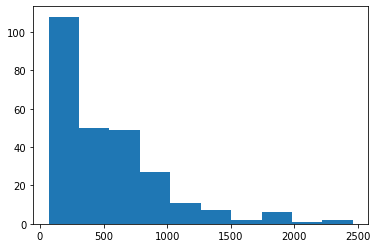

In [11]:
plt.hist(hitters["Salary"]);

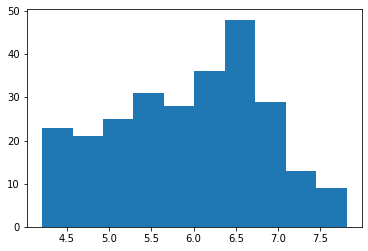

In [13]:
plt.hist(np.log(hitters["Salary"]));   # so by taking log of salary it will be seen better in nature

In [14]:
hitters["Salary"]=np.log(hitters["Salary"])  # replace main salary with log values

In [15]:
hitters.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,6.163315,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,6.173786,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,6.214608,N
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,4.516339,N
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,6.620073,A


In [16]:
hitters=pd.get_dummies(hitters,columns=['League','Division','NewLeague'],drop_first=True) # here create dummy variables of 
#leauge,division,to get values in the form of 0 and1
hitters.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,6.163315,1,1,1
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,6.173786,0,1,0
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,6.214608,1,0,1
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,4.516339,1,0,1
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,6.620073,0,1,0


In [17]:
# creating feature matrix and target array

X=hitters.copy()  # create copy of hitters to x
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,6.163315,1,1,1
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,6.173786,0,1,0
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,6.214608,1,0,1
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,4.516339,1,0,1
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,6.620073,0,1,0


In [21]:
del X["Salary"]  # delet salary to keep only independent vari

In [22]:
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,1,1,1
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,0,1,0
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,1,0,1
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,1,0,1
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,0,1,0


In [23]:
y=hitters.Salary  # dependent salary into y

In [24]:
y.head()

-Alan Ashby          6.163315
-Alvin Davis         6.173786
-Andre Dawson        6.214608
-Andres Galarraga    4.516339
-Alfredo Griffin     6.620073
Name: Salary, dtype: float64

In [26]:
X.shape,y.shape

((263, 19), (263,))

In [27]:
# apply train test split to data

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
# where test size is 20% and random state=42

In [28]:
X_train.shape,X_test.shape

((210, 19), (53, 19))

In [29]:
y_train.shape,y_test.shape

((210,), (53,))

In [108]:
# building model of decision tree based on hits and year variables i.e. we are taken in ppt on train data

model=DecisionTreeRegressor(max_depth=3)

In [109]:
model.fit(X_train[["Years","Hits"]],y_train)

DecisionTreeRegressor(max_depth=3)

In [110]:
a=export_graphviz(model,out_file='Regtree.dot',feature_names=X_train[['Years','Hits']].columns)  

In [111]:
from sklearn import tree

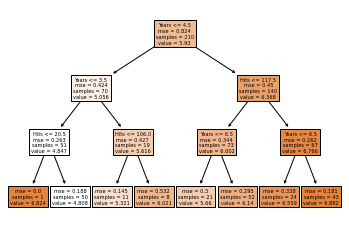

In [112]:
b=tree.plot_tree(model,feature_names=X_train[['Years','Hits']].columns,filled=True)

In [113]:
model.score(X_train[["Years","Hits"]],y_train)

0.6946560237040431

In [119]:
y_pred_train=model.predict(X_train[["Years","Hits"]])
y_pred_train[:10]

array([4.80783652, 4.80783652, 6.55911788, 6.1400697 , 6.1400697 ,
       6.1400697 , 6.88187365, 6.88187365, 6.55911788, 6.55911788])

In [123]:
# to find r2 score

SSE_m = np.sum((y_train-y_pred_train)**2)
SSE_m

52.83009903210645

In [124]:
SST_m = np.sum((y_train-np.mean(y_train))**2)
SST_m

173.01831093239082

In [125]:
1-SSE_m/SST_m

0.6946560237040431

In [126]:
np.sqrt(mean_squared_error(y_train, y_pred_train))

0.5015694370203271

In [127]:
# apply predictions on test data


y_pred_test=model.predict(X_test[["Years","Hits"]])
y_pred_test[:10]

array([6.88187365, 6.88187365, 6.88187365, 5.32142188, 6.1400697 ,
       5.32142188, 6.02077623, 4.80783652, 6.88187365, 6.1400697 ])

In [128]:
# to find r2 score

SSE_m1 = np.sum((y_test-y_pred_test)**2)
SSE_m1

12.761621410163045

In [129]:
SST_m1 = np.sum((y_test-np.mean(y_test))**2)
SST_m1

34.12438231121495

In [130]:
1-SSE_m1/SST_m1

0.6260263030176828

In [131]:
np.sqrt(mean_squared_error(y_test, y_pred_test))

0.4906987972531804

In [133]:
""""
 PRUNING OF TREE
 >by creating tree there are somewhat overfitting so it is cutting extra part of tree
 >max_leaf_nodes: reduce the no of leaf nodes
 >min_sample_leaf: restrict the size of sample leaf
 
Create a decision tree model with all variables and a min_samples_leaf = 5 and then with min_samples_leaf = 25.

1. Compare the performance of two models with respect to R-squared and RMSE.

2. How the two models will perform on train and test data."""




model_leaf5 = DecisionTreeRegressor(min_samples_leaf=5)  # here providing min sample leaf should be 5

model_leaf5.fit(X_train,y_train)

DecisionTreeRegressor(min_samples_leaf=5)

In [135]:
tree1=export_graphviz(model_leaf5,out_file='tree1.dot',feature_names=X_train.columns)  

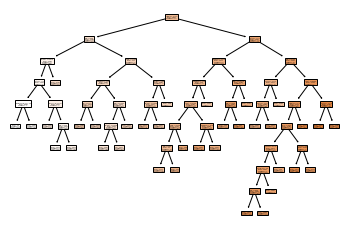

In [136]:
t1=tree.plot_tree(model_leaf5,feature_names=X_train.columns,filled=True)

In [137]:
model_leaf5.score(X_train,y_train) # it gives best score of model

0.8903434219802548

In [138]:
y_pred_train1=model_leaf5.predict(X_train)  # apply prediction on train data
y_pred_train1[:10]

array([5.26903203, 4.78068548, 6.53473526, 6.56533182, 6.17152274,
       5.07376609, 6.73465677, 7.20420712, 6.16919224, 5.7847352 ])

In [139]:
SSE_m3 = np.sum((y_pred_train1-y_train)**2)  # find r2 score of  model
print(SSE_m3)
SST_m3 = np.sum((y_train-np.mean(y_train))**2)
print(SST_m3)
r2_m3 = 1-SSE_m3/SST_m3
r2_m3

18.97259591160225
173.01831093239082


0.8903434219802547

In [140]:
np.sqrt(mean_squared_error(y_train, y_pred_train1))

0.3005756058251461

In [141]:
# apply prediction on test data

y_pred_test1=model_leaf5.predict(X_test)  # apply prediction on train data
y_pred_test1[:10]

array([6.93926177, 6.53473526, 6.73465677, 4.78068548, 6.86671184,
       5.89965916, 5.29839704, 4.61954674, 6.40819243, 6.86671184])

In [142]:
SSE_m4 = np.sum((y_pred_test1-y_test)**2)  # find r2 score of  model
print(SSE_m4)
SST_m4 = np.sum((y_test-np.mean(y_test))**2)
print(SST_m4)
r2_m4 = 1-SSE_m4/SST_m4
r2_m4

25.584242896407314
34.12438231121495


0.2502650256617518

In [143]:
np.sqrt(mean_squared_error(y_test, y_pred_test1))  # find rmse

0.694781666484628

In [145]:
model_leaf25 = DecisionTreeRegressor(min_samples_leaf=25)  # here providing min sample leaf should be 25

model_leaf25.fit(X_train,y_train)

DecisionTreeRegressor(min_samples_leaf=25)

In [146]:
model_leaf25.fit(X_train,y_train)

DecisionTreeRegressor(min_samples_leaf=25)

In [147]:
tree2=export_graphviz(model_leaf25,out_file='tree2.dot',feature_names=X_train.columns)  

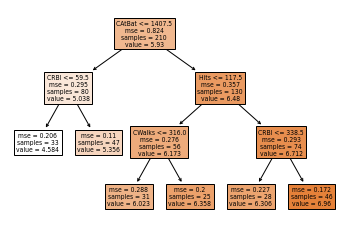

In [148]:
t2=tree.plot_tree(model_leaf25,feature_names=X_train.columns,filled=True)

In [149]:
model_leaf25.score(X_train,y_train) # it gives best score of model

0.7679127393406748

In [150]:
y_pred_train2=model_leaf25.predict(X_train)  # apply prediction on train data
y_pred_train2[:10]

array([5.35647286, 4.58364364, 6.30581952, 6.02346903, 6.35770109,
       5.35647286, 6.95983842, 6.95983842, 6.30581952, 6.30581952])

In [151]:
SSE_m4 = np.sum((y_pred_train2-y_train)**2)  # find r2 score of  model
print(SSE_m4)
SST_m4 = np.sum((y_train-np.mean(y_train))**2)
print(SST_m4)
r2_m4 = 1-SSE_m4/SST_m4
r2_m4

40.155345828201966
173.01831093239082


0.7679127393406748

In [152]:
np.sqrt(mean_squared_error(y_train, y_pred_train2)) # find RMSE

0.43728244020912554

In [153]:
# apply prediction on test data

y_pred_test2=model_leaf25.predict(X_test)  # apply prediction on train data
y_pred_test2[:10]

array([6.95983842, 6.95983842, 6.95983842, 4.58364364, 6.35770109,
       5.35647286, 5.35647286, 4.58364364, 6.95983842, 6.35770109])

In [154]:
SSE_m5 = np.sum((y_pred_test2-y_test)**2)  # find r2 score of  model
print(SSE_m5)
SST_m5 = np.sum((y_test-np.mean(y_test))**2)
print(SST_m5)
r2_m5 = 1-SSE_m5/SST_m5
r2_m5

21.95488497042628
34.12438231121495


0.3566217618183575

In [155]:
np.sqrt(mean_squared_error(y_test, y_pred_test2))  # find rmse

0.6436172097213937

In [ ]:
# so overall the model with all features and min sample leaf 5 will gives score 0.89 and rmse=0.30 which
#is very good predictive model

In [ ]:
"""" but here in all of the above we are taking the pruning parameter in our way (min_sample_leaf=5,25,etc or max_leaf_nodes or max_depth
 so all of the results are correct as per senario but if dont know how many number of nodes,leafs have to take 
 in that case we use grid search cv
 
 because as if we use the no of nodes more than require or limit then COST COMPLEXITY OF PRUNNING comes to the picture 
 and it will panalise as per number of nodes increses in case. it will affect on score in way(score=ssr+alpha*t  where alpha is 0 and 1)
 
 
 so to reduce this panelty we use grid serach cv in case """


""""
here CV ---> main parmter which will help to generalise the accurecy of model
             as if it 80/20 train test split then at each time random varibles come to picture and hence score is varying in nature
             but if we use cv then it will make a testing in training as well with k-fold provided and at each iteration
             gives new model with some score as ew can take a single model from that or take avg of scores of model and find best fit from that
  
  
  
here hyper para optimization(grid search)-----> here in the case if we want to make a optimal tree i.e.high accurecy so for that we 
                    
                    want some generalise paramters(leaf,depth,size) and also want cv for better model performance hence here we
                    take grid search it will take depth,leaves,etc as parametrs and do the truth table calculation with eacha nd 
                    every para.at that much of time so ,at some point we will get better accurecy with some number of parameters 
                    that we have so we will build our tree with that optimal parametes to get optimal model
 
 
 
 

In [159]:
# actual prunning of tree with gridsearch cv 

parameters = {"max_depth":[1,2,3,4,5,6]}  # provide parameters upto which will have to make depth

In [160]:
from sklearn.model_selection import GridSearchCV   # import lib
grid1=GridSearchCV(model_leaf5,parameters,cv=10,scoring="r2") # create object

In [163]:
grid1.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(min_samples_leaf=25),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6]}, scoring='r2')

In [164]:
grid1.best_params_  # see the no of depth 

{'max_depth': 5}

In [165]:
grid1.best_score_  # acc score

0.6395098318379177

In [168]:
model_prune = DecisionTreeRegressor(max_depth=5) # apply the depth to model

In [169]:
model_prune.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5)

In [170]:
model_prune.score(X_train, y_train)  # here model is overfitted

0.9233595296368824

In [171]:
y_pred_train = model_prune.predict(X_train)  # apply prediction on test data
y_pred_train[:10]

array([5.20592481, 4.73423843, 6.74651179, 6.39911724, 6.33861046,
       4.99933569, 6.74651179, 7.38442653, 5.91887495, 4.49980967])

In [172]:
SSE_prune = np.sum((y_pred_train-y_train)**2)
SSE_prune

13.260204731290575

In [173]:
SST = np.sum((y_train-np.mean(y_train))**2)
SST

173.01831093239082

In [174]:
1 - SSE_prune/SST # find r2

0.9233595296368824

In [175]:
np.sqrt(mean_squared_error(y_train, y_pred_train))  # find rmse

0.25128436492102857

In [176]:
model_prune.feature_importances_  # find which feature is important

array([0.00532927, 0.05811731, 0.00088217, 0.01091188, 0.00248448,
       0.03241008, 0.        , 0.66794396, 0.00794789, 0.04416399,
       0.00229826, 0.1352323 , 0.00404313, 0.02823529, 0.        ,
       0.        , 0.        , 0.        , 0.        ])

In [177]:
data = pd.Series(model_prune.feature_importances_,index = X_train.columns)
data

AtBat          0.005329
Hits           0.058117
HmRun          0.000882
Runs           0.010912
RBI            0.002484
Walks          0.032410
Years          0.000000
CAtBat         0.667944
CHits          0.007948
CHmRun         0.044164
CRuns          0.002298
CRBI           0.135232
CWalks         0.004043
PutOuts        0.028235
Assists        0.000000
Errors         0.000000
League_N       0.000000
Division_W     0.000000
NewLeague_N    0.000000
dtype: float64

In [178]:
data.sort_values(ascending=True,inplace=True)  # data sort asscending manner

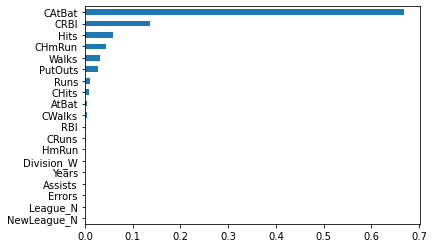

In [179]:
data.plot.barh()

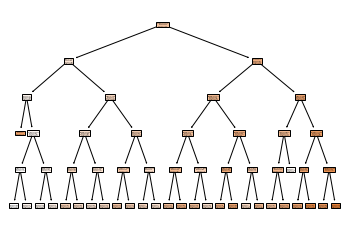

In [180]:
# plot tree

tree3=export_graphviz(model_prune,out_file='Regtreeprune.dot',feature_names=X_train.columns)  
t3=tree.plot_tree(model_prune,feature_names=X_train.columns,filled=True)

In [ ]:
# it gives best fit regression tree at score 0.92 and rmse=0.20